In [1]:
import gym
import torch
import numpy as np
import sys
sys.path.append('../')

from sac_lib import SoftActorCritic, NormalizedActions, ReplayBuffer, PolicyNetwork

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot(frame_idx, rewards):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    plt.plot(rewards)
    plt.show()

In [3]:
# env = NormalizedActions(gym.make("Pendulum-v0"))
from pybullet_envs.bullet.minitaur_gym_env import MinitaurBulletEnv
from gym.envs.mujoco import InvertedPendulumEnv, HalfCheetahEnv, HopperEnv, AntEnv
from pybullet_envs.gym_pendulum_envs import InvertedPendulumSwingupBulletEnv
from pybullet_envs.gym_locomotion_envs import AntBulletEnv, HalfCheetahBulletEnv
# env = NormalizedActions(gym.make("Pendulum-v0"))
env = NormalizedActions(HopperEnv())

current_dir=/home/burn/.local/lib/python3.6/site-packages/pybullet_envs/bullet


In [4]:
action_dim = env.action_space.shape[0]
state_dim  = env.observation_space.shape[0]
hidden_dim = 128

policy_net = PolicyNetwork(state_dim, action_dim, hidden_dim)

if torch.cuda.is_available():
    policy_net = policy_net.cuda()


replay_buffer_size = 1000000
replay_buffer = ReplayBuffer(replay_buffer_size)

sac = SoftActorCritic(policy=policy_net, 
                      state_dim=state_dim, 
                      action_dim=action_dim, 
                      replay_buffer=replay_buffer)

In [5]:
max_frames  = 100000
max_steps   = 1000
frame_idx   = 0
rewards     = []
batch_size  = 128

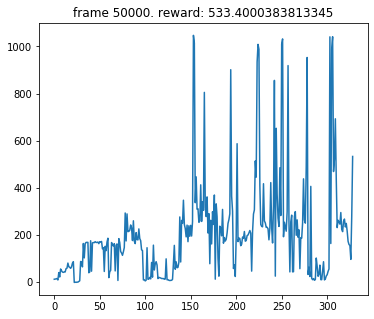

tensor([0.1314], device='cuda:0', grad_fn=<ExpBackward>)


KeyboardInterrupt: 

In [6]:
while frame_idx < max_frames:
    state = env.reset()
    episode_reward = 0
    
    for step in range(max_steps):
        action = policy_net.get_action(state)
        for _ in range(1):
            next_state, reward, done, _ = env.step(action)
        
        replay_buffer.push(state, action, reward, next_state, done)
        if len(replay_buffer) > batch_size:
            sac.soft_q_update(batch_size)
        
        state = next_state
        episode_reward += reward
        frame_idx += 1
        
        env.render()
        
        if frame_idx % 1000 == 0 and len(rewards) > 0:
            plot(frame_idx, rewards)
            print(sac.log_ent_coef.exp())
        
        if done:
            break
        
    rewards.append(episode_reward)

In [1]:
plot(frame_idx, rewards)

NameError: name 'plot' is not defined